<a href="https://colab.research.google.com/github/WE2722/OEE/blob/main/OEE_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the data line_status_notcleaned

In [129]:
# Voir Exploratory_Data_Anallysis in Kaggle

#Loading and pre-processing the data line_status_notcleaned


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df_ls = pd.read_csv('/content/line_status_notcleaned.csv')

In [136]:
df_prd = pd.read_csv('/content/production_data.csv')

In [ ]:
df_ls.head()

,PRODUCTION_LINE,SHIFT,START_DATETIME,FINISH_DATETIME,STATUS,IS_DELETED,STATUS_NM,STATUS_NAME,Unnamed: 8
0,LINE-01,1,1/2/23 6:00,1/2/23 6:05,11,0,Meeting,Meeting,NaN
1,LINE-01,1,1/2/23 6:05,1/2/23 8:52,19,0,Other,Other,NaN
2,LINE-01,1,1/2/23 8:52,1/2/23 9:05,1,0,Production,Production,NaN
3,LINE-01,1,1/2/23 9:05,1/2/23 9:27,13,0,Break Time,Break Time,NaN
4,LINE-01,1,1/2/23 9:27,1/2/23 12:05,1,0,Production,Production,NaN


In [ ]:
df_prd.head()

,START_DATETIME,FINISH_DATETIME,LINE
0,2023-01-02 08:52:10.560,2023-01-02 08:52:15.453,LINE-01
1,2023-01-02 08:52:17.670,2023-01-02 08:52:22.240,LINE-02
2,2023-01-02 08:52:33.167,2023-01-02 08:52:38.153,LINE-01
3,2023-01-02 08:52:40.210,2023-01-02 08:52:44.840,LINE-02
4,2023-01-02 08:52:44.963,2023-01-02 08:52:49.853,LINE-01


In [ ]:
df_ls['START_DATETIME'] = pd.to_datetime(df_ls['START_DATETIME'])
df_ls = df_ls.set_index('START_DATETIME')
df_ls.head()

<ipython-input-42-a8e9a6ef89a9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ls['START_DATETIME'] = pd.to_datetime(df_ls['START_DATETIME'])


,PRODUCTION_LINE,SHIFT,FINISH_DATETIME,STATUS,IS_DELETED,STATUS_NM,STATUS_NAME,Unnamed: 8
START_DATETIME,,,,,,,,
2023-01-02 06:00:00,LINE-01,1,1/2/23 6:05,11,0,Meeting,Meeting,NaN
2023-01-02 06:05:00,LINE-01,1,1/2/23 8:52,19,0,Other,Other,NaN
2023-01-02 08:52:00,LINE-01,1,1/2/23 9:05,1,0,Production,Production,NaN
2023-01-02 09:05:00,LINE-01,1,1/2/23 9:27,13,0,Break Time,Break Time,NaN
2023-01-02 09:27:00,LINE-01,1,1/2/23 12:05,1,0,Production,Production,NaN


In [ ]:
df_ls = df_ls[df_ls['IS_DELETED'] != 1]
df_ls.head()

,PRODUCTION_LINE,SHIFT,FINISH_DATETIME,STATUS,IS_DELETED,STATUS_NM,STATUS_NAME,Unnamed: 8
START_DATETIME,,,,,,,,
2023-01-02 06:00:00,LINE-01,1,1/2/23 6:05,11,0,Meeting,Meeting,NaN
2023-01-02 06:05:00,LINE-01,1,1/2/23 8:52,19,0,Other,Other,NaN
2023-01-02 08:52:00,LINE-01,1,1/2/23 9:05,1,0,Production,Production,NaN
2023-01-02 09:05:00,LINE-01,1,1/2/23 9:27,13,0,Break Time,Break Time,NaN
2023-01-02 09:27:00,LINE-01,1,1/2/23 12:05,1,0,Production,Production,NaN


In [ ]:
df_ls = df_ls.drop(['STATUS_NM', 'STATUS'], axis=1)
df_ls.head()


,PRODUCTION_LINE,SHIFT,FINISH_DATETIME,IS_DELETED,STATUS_NAME,Unnamed: 8
START_DATETIME,,,,,,
2023-01-02 06:00:00,LINE-01,1,1/2/23 6:05,0,Meeting,NaN
2023-01-02 06:05:00,LINE-01,1,1/2/23 8:52,0,Other,NaN
2023-01-02 08:52:00,LINE-01,1,1/2/23 9:05,0,Production,NaN
2023-01-02 09:05:00,LINE-01,1,1/2/23 9:27,0,Break Time,NaN
2023-01-02 09:27:00,LINE-01,1,1/2/23 12:05,0,Production,NaN


In [ ]:
df_ls = df_ls.drop(['FINISH_DATETIME'], axis=1)
df_ls.head()


,PRODUCTION_LINE,SHIFT,IS_DELETED,STATUS_NAME,Unnamed: 8
START_DATETIME,,,,,
2023-01-02 06:00:00,LINE-01,1,0,Meeting,NaN
2023-01-02 06:05:00,LINE-01,1,0,Other,NaN
2023-01-02 08:52:00,LINE-01,1,0,Production,NaN
2023-01-02 09:05:00,LINE-01,1,0,Break Time,NaN
2023-01-02 09:27:00,LINE-01,1,0,Production,NaN


In [ ]:
finish_datetime = []
for i in range(len(df_ls) - 1):
    finish_datetime.append(df_ls.index[i+1])
finish_datetime.append(pd.NaT)  # Append NaT for the last row

df_ls['FINISH_DATETIME'] = finish_datetime
df_ls.head()


,PRODUCTION_LINE,SHIFT,IS_DELETED,STATUS_NAME,Unnamed: 8,FINISH_DATETIME
START_DATETIME,,,,,,
2023-01-02 06:00:00,LINE-01,1,0,Meeting,NaN,2023-01-02 06:05:00
2023-01-02 06:05:00,LINE-01,1,0,Other,NaN,2023-01-02 08:52:00
2023-01-02 08:52:00,LINE-01,1,0,Production,NaN,2023-01-02 09:05:00
2023-01-02 09:05:00,LINE-01,1,0,Break Time,NaN,2023-01-02 09:27:00
2023-01-02 09:27:00,LINE-01,1,0,Production,NaN,2023-01-02 12:05:00


In [ ]:
df_ls = df_ls.drop(['IS_DELETED'], axis=1)
df_ls.head()


,PRODUCTION_LINE,SHIFT,STATUS_NAME,Unnamed: 8,FINISH_DATETIME
START_DATETIME,,,,,
2023-01-02 06:00:00,LINE-01,1,Meeting,NaN,2023-01-02 06:05:00
2023-01-02 06:05:00,LINE-01,1,Other,NaN,2023-01-02 08:52:00
2023-01-02 08:52:00,LINE-01,1,Production,NaN,2023-01-02 09:05:00
2023-01-02 09:05:00,LINE-01,1,Break Time,NaN,2023-01-02 09:27:00
2023-01-02 09:27:00,LINE-01,1,Production,NaN,2023-01-02 12:05:00


In [ ]:
df_ls = df_ls.drop(['Unnamed: 8'], axis=1)
df_ls.head()


,PRODUCTION_LINE,SHIFT,STATUS_NAME,FINISH_DATETIME
START_DATETIME,,,,
2023-01-02 06:00:00,LINE-01,1,Meeting,2023-01-02 06:05:00
2023-01-02 06:05:00,LINE-01,1,Other,2023-01-02 08:52:00
2023-01-02 08:52:00,LINE-01,1,Production,2023-01-02 09:05:00
2023-01-02 09:05:00,LINE-01,1,Break Time,2023-01-02 09:27:00
2023-01-02 09:27:00,LINE-01,1,Production,2023-01-02 12:05:00


In [ ]:
cols = list(df_ls.columns)
cols.insert(0, cols.pop(cols.index('FINISH_DATETIME')))
df_ls = df_ls.loc[:, cols]
df_ls.head()


,FINISH_DATETIME,PRODUCTION_LINE,SHIFT,STATUS_NAME
START_DATETIME,,,,
2023-01-02 06:00:00,2023-01-02 06:05:00,LINE-01,1,Meeting
2023-01-02 06:05:00,2023-01-02 08:52:00,LINE-01,1,Other
2023-01-02 08:52:00,2023-01-02 09:05:00,LINE-01,1,Production
2023-01-02 09:05:00,2023-01-02 09:27:00,LINE-01,1,Break Time
2023-01-02 09:27:00,2023-01-02 12:05:00,LINE-01,1,Production


# Visualizing line_status_notcleaned data

<ipython-input-77-2d007b2f7c1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS_NAME', data=df_ls, palette='viridis')


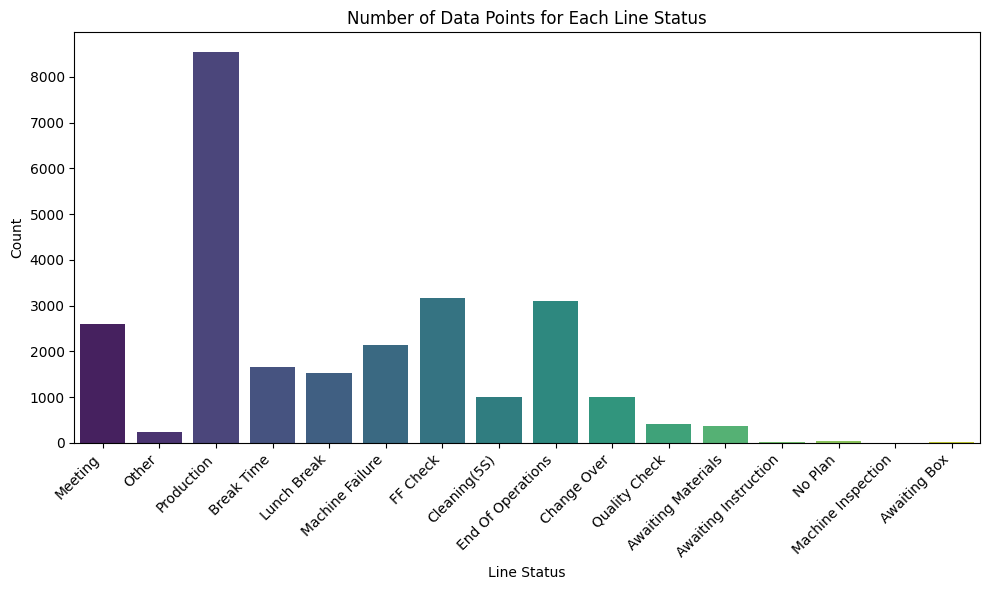

In [ ]:
status_counts = df_ls['STATUS_NAME'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='STATUS_NAME', data=df_ls, palette='viridis')
plt.title('Number of Data Points for Each Line Status')
plt.xlabel('Line Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 2e+10x3e+10 with 0 Axes>

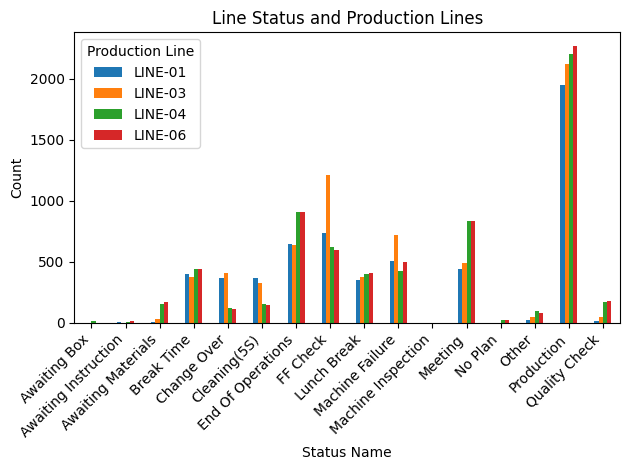

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


status_line_counts = df_ls.groupby(['STATUS_NAME', 'PRODUCTION_LINE']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
status_line_counts.plot(kind='bar', stacked=False)
plt.title('Line Status and Production Lines')
plt.xlabel('Status Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Production Line')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

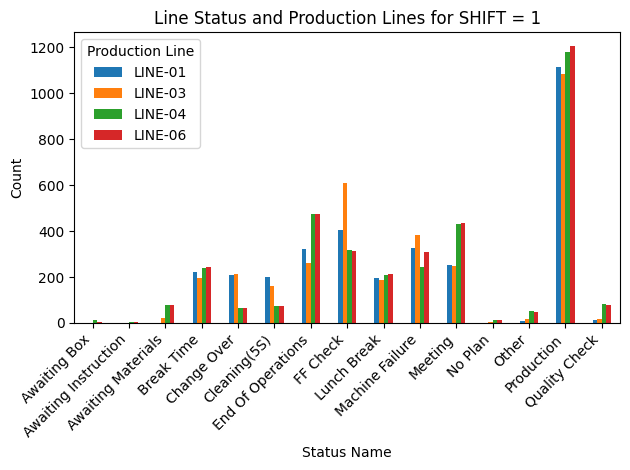

<Figure size 1000x600 with 0 Axes>

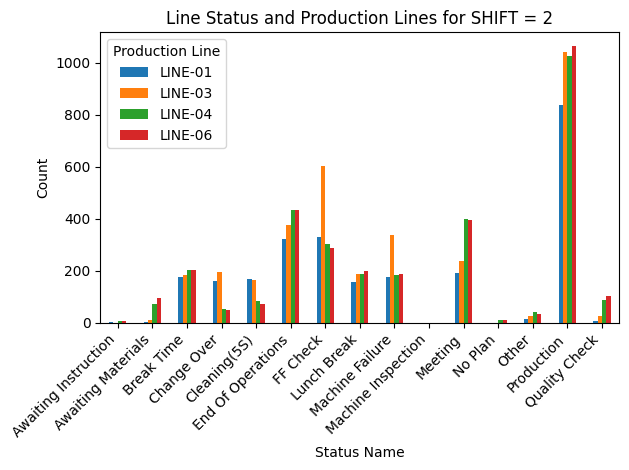

In [ ]:
for shift_value in [1, 2]:
    df_shift = df_ls[df_ls['SHIFT'] == shift_value]
    status_line_counts = df_shift.groupby(['STATUS_NAME', 'PRODUCTION_LINE']).size().unstack(fill_value=0)
    plt.figure(figsize=(10, 6))
    status_line_counts.plot(kind='bar', stacked=False)
    plt.title(f'Line Status and Production Lines for SHIFT = {shift_value}')
    plt.xlabel('Status Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Production Line')
    plt.tight_layout()
    plt.show()


# Exploring and visualizing the production_data

In [ ]:
df_prd.head()

,START_DATETIME,FINISH_DATETIME,LINE
0,2023-01-02 08:52:10.560,2023-01-02 08:52:15.453,LINE-01
1,2023-01-02 08:52:17.670,2023-01-02 08:52:22.240,LINE-02
2,2023-01-02 08:52:33.167,2023-01-02 08:52:38.153,LINE-01
3,2023-01-02 08:52:40.210,2023-01-02 08:52:44.840,LINE-02
4,2023-01-02 08:52:44.963,2023-01-02 08:52:49.853,LINE-01


In [ ]:
print(len(df_prd['LINE'].unique()))

5


In [ ]:
print(len(df_prd))

3959705


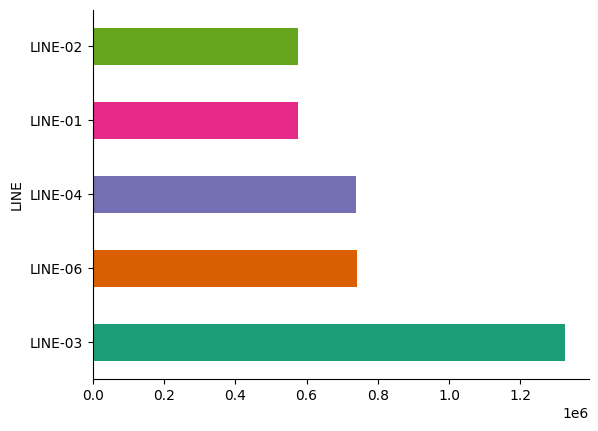

In [ ]:
df_prd['LINE'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)


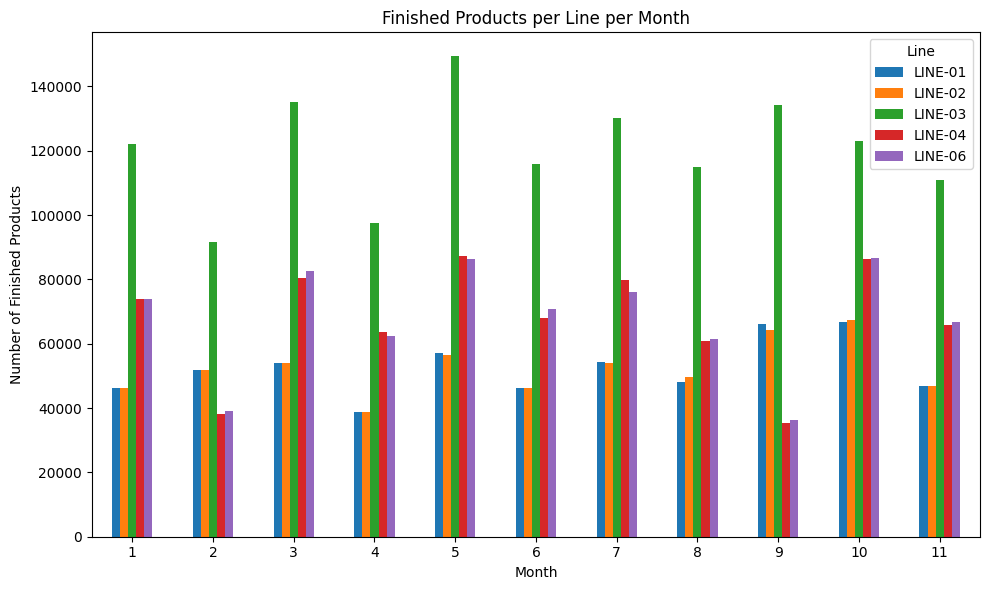

In [ ]:
# Convert 'FINISH_DATETIME' to datetime objects
df_prd['FINISH_DATETIME'] = pd.to_datetime(df_prd['FINISH_DATETIME'])

# Extract month from 'FINISH_DATETIME'
df_prd['month'] = df_prd['FINISH_DATETIME'].dt.month

# Group data by month and line
monthly_line_counts = df_prd.groupby(['month', 'LINE']).size().unstack()

# Plotting
monthly_line_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Finished Products per Line per Month')
plt.xlabel('Month')
plt.ylabel('Number of Finished Products')
plt.xticks(rotation=0)
plt.legend(title='Line')
plt.tight_layout()
plt.show()


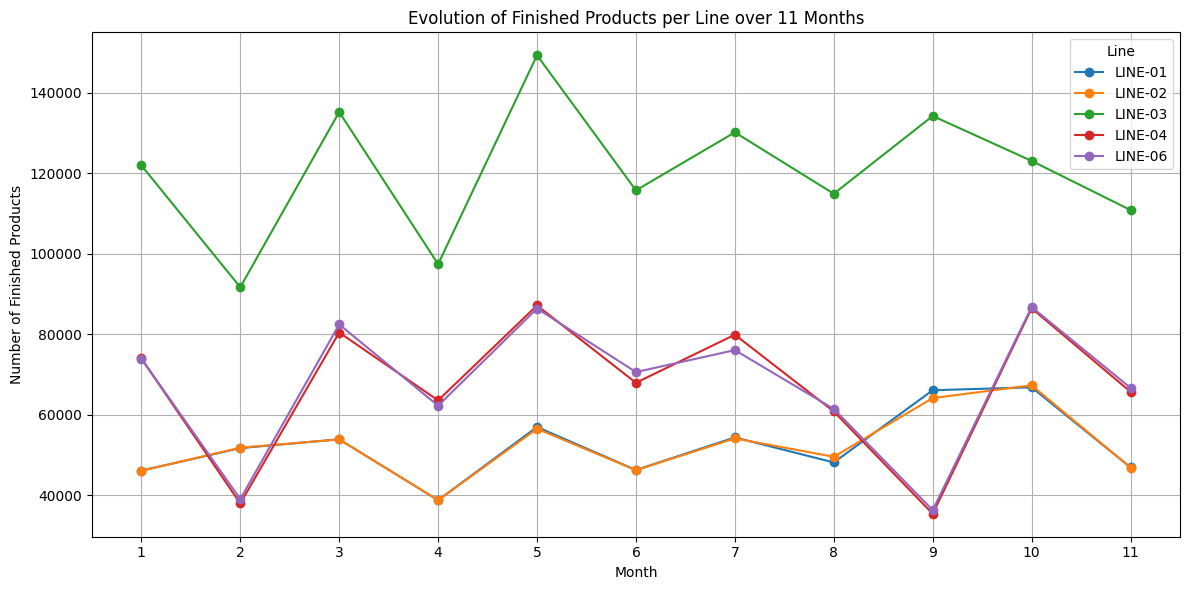

In [ ]:
# Convert 'START_DATETIME' and 'FINISH_DATETIME' to datetime objects if not already
df_prd['START_DATETIME'] = pd.to_datetime(df_prd['START_DATETIME'])
df_prd['FINISH_DATETIME'] = pd.to_datetime(df_prd['FINISH_DATETIME'])

# Extract month from 'FINISH_DATETIME'
df_prd['month'] = df_prd['FINISH_DATETIME'].dt.month

# Group data by month and line
monthly_line_counts = df_prd.groupby(['month', 'LINE']).size().unstack()

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for line in monthly_line_counts.columns:
    plt.plot(monthly_line_counts.index, monthly_line_counts[line], label=line, marker='o')

plt.title('Evolution of Finished Products per Line over 11 Months')
plt.xlabel('Month')
plt.ylabel('Number of Finished Products')
plt.xticks(monthly_line_counts.index)  # Show all month ticks
plt.legend(title='Line')
plt.grid(True)
plt.tight_layout()
plt.show()


# Preparing the data and calculating the OEE

## 1. Preprocessing and Feature Engineering

In [ ]:
df_ls['START_DATETIME'] = pd.to_datetime(df_ls['START_DATETIME'])
df_ls['FINISH_DATETIME'] = pd.to_datetime(df_ls['FINISH_DATETIME'])
df_prd['FINISH_DATETIME'] = pd.to_datetime(df_prd['FINISH_DATETIME'])


if 'STATUS_NAME' in df_ls.columns:
    df_ls['STATUS_CATEGORY'] = df_ls['STATUS_NAME'].map(status_to_category_map)
    unmapped_statuses = df_ls[df_ls['STATUS_CATEGORY'].isna()]['STATUS_NAME'].unique()
    if len(unmapped_statuses) > 0:
        print(f"\nWarning: Unmapped statuses found: {unmapped_statuses}. Mapping them to 'Other'.")
        df_ls['STATUS_CATEGORY'].fillna("Unknown", inplace=True)
else:
    raise KeyError("The required column 'STATUS_NAME' was not found in df_ls. Please check your input data.")



df_ls['DURATION'] = df_ls['FINISH_DATETIME'] - df_ls['START_DATETIME']

print(f"\nDURATION column dtype: {df_ls['DURATION'].dtype}")

df_ls['Duration_Seconds'] = df_ls['DURATION'].dt.total_seconds()

df_ls['Date'] = df_ls['START_DATETIME'].dt.date

df_prd['Date'] = df_prd['FINISH_DATETIME'].dt.date

print("\nSample df_ls (after preprocessing):")
display(df_ls.head())


## 2. Calculate Daily Planned Production Time and Actual Run Time

In [111]:
planned_statuses = ['Production', 'Scheduled Stop', 'Unexpected Stop']

df_planned_time = df_ls[df_ls['STATUS_CATEGORY'].isin(planned_statuses)]

# Calculate total Planned Production Time per line per day
daily_planned_time = df_planned_time.groupby(['PRODUCTION_LINE', 'Date'])['Duration_Seconds'].sum().reset_index()
daily_planned_time = daily_planned_time.rename(columns={'Duration_Seconds': 'Planned_Production_Time_Seconds'})

# Calculate Actual Run Time (only 'Production' status) per line per day
df_run_time = df_ls[df_ls['STATUS_CATEGORY'] == 'Production']
daily_run_time = df_run_time.groupby(['PRODUCTION_LINE', 'Date'])['Duration_Seconds'].sum().reset_index()
daily_run_time = daily_run_time.rename(columns={'Duration_Seconds': 'Actual_Run_Time_Seconds'})

# Merge planned and run times
# Use outer merge here to capture days where there was planned time but zero run time, or vice-versa (less common)
daily_times = pd.merge(daily_planned_time, daily_run_time, on=['PRODUCTION_LINE', 'Date'], how='outer')

# Fill NaN for run time with 0 (if a line had planned time but zero production status time)
# Also fill NaN for planned time with 0 (if somehow only run time existed - less likely but possible)
daily_times['Planned_Production_Time_Seconds'] = daily_times['Planned_Production_Time_Seconds'].fillna(0)
daily_times['Actual_Run_Time_Seconds'] = daily_times['Actual_Run_Time_Seconds'].fillna(0)

## 3. Calculate Daily Actual Output

In [112]:
daily_output = df_prd.groupby(['LINE', 'Date']).size().reset_index(name='Total_Actual_Output')
daily_output = daily_output.rename(columns={'LINE': 'PRODUCTION_LINE'})

## 4. Merge Time Data and Output Data

In [113]:
# Merge the time calculations with the output counts
daily_oee_data = pd.merge(daily_times, daily_output, on=['PRODUCTION_LINE', 'Date'], how='outer')

# Fill NaN values resulting from the outer merge
# If no time data, planned/run time is 0. If no output data, output is 0.
daily_oee_data['Planned_Production_Time_Seconds'] = daily_oee_data['Planned_Production_Time_Seconds'].fillna(0)
daily_oee_data['Actual_Run_Time_Seconds'] = daily_oee_data['Actual_Run_Time_Seconds'].fillna(0)
daily_oee_data['Total_Actual_Output'] = daily_oee_data['Total_Actual_Output'].fillna(0).astype(int)

## 5. Calculate OEE Components

In [114]:
# Add Ideal Cycle Time based on Production Line
daily_oee_data['Ideal_Cycle_Time_Seconds'] = daily_oee_data['PRODUCTION_LINE'].map(cycle_times)
# Handle cases where a line in the data might not be in cycle_times map
missing_cycle_time_lines = daily_oee_data[daily_oee_data['Ideal_Cycle_Time_Seconds'].isna()]['PRODUCTION_LINE'].unique()
if len(missing_cycle_time_lines) > 0:
    print(f"\nWarning: Ideal Cycle Time not found for lines: {missing_cycle_time_lines}. Performance and OEE cannot be calculated for these lines/days.")


# -- Availability --
# Availability = Actual Run Time / Planned Production Time
daily_oee_data['Availability'] = np.where(
    daily_oee_data['Planned_Production_Time_Seconds'] > 0,
    daily_oee_data['Actual_Run_Time_Seconds'] / daily_oee_data['Planned_Production_Time_Seconds'],
    0  # Assign 0 if Planned Production Time is zero
)

# -- Performance --
# Performance = (Total Actual Output * Ideal Cycle Time) / Actual Run Time
# Performance = Ideal Run Time / Actual Run Time
daily_oee_data['Performance'] = np.where(
    # Check for non-zero run time AND non-null ideal cycle time
    (daily_oee_data['Actual_Run_Time_Seconds'] > 0) & (daily_oee_data['Ideal_Cycle_Time_Seconds'].notna()),
    (daily_oee_data['Total_Actual_Output'] * daily_oee_data['Ideal_Cycle_Time_Seconds']) / daily_oee_data['Actual_Run_Time_Seconds'],
    0 # Assign 0 if Actual Run Time is zero or Ideal Cycle Time is missing
)

# Cap performance at 1 (or slightly higher like 1.05) if needed, as >1 often indicates cycle time inaccuracy
# daily_oee_data['Performance'] = daily_oee_data['Performance'].clip(upper=1.0) # Optional capping

# -- Quality --
# Quality = Good Count / Total Count
# *** NOTE: We assumed that ALL Total_Actual_Output are 'Good' items. ***
# *** (Good Count = Total_Actual_Output - Scrap_Count) and use that here. ***
# Good Count = Total_Actual_Output (in this simplified version)
daily_oee_data['Quality'] = np.where(
    daily_oee_data['Total_Actual_Output'] > 0,
    1.0, # Assign 1 (100%) if any production occurred (assuming all good)
    0 # Assign 0 if no production occurred (cannot have quality without output)
    # If Total_Actual_Output is 0, OEE will be 0 anyway because Performance will be 0.
    # Setting Quality to 0 here is consistent. Alternatively, could use 1 or NaN if preferred.
)



## 6. Calculate Final OEE

In [115]:
# OEE = Availability * Performance * Quality
daily_oee_data['OEE'] = daily_oee_data['Availability'] * daily_oee_data['Performance'] * daily_oee_data['Quality']


## 7. Final Formatting and Output

In [116]:
final_columns = [
    'PRODUCTION_LINE',
    'Date',
    'Planned_Production_Time_Seconds',
    'Actual_Run_Time_Seconds',
    'Total_Actual_Output',
    'Ideal_Cycle_Time_Seconds',
    'Availability',
    'Performance',
    'Quality',
    'OEE'
]
# Ensure all required columns exist before selecting
existing_cols = [col for col in final_columns if col in daily_oee_data.columns]
daily_oee_results = daily_oee_data[existing_cols].copy()

# Convert Date back to datetime object if needed (it became object type during merge sometimes)
daily_oee_results['Date'] = pd.to_datetime(daily_oee_results['Date'])

# Sort results
daily_oee_results = daily_oee_results.sort_values(by=['PRODUCTION_LINE', 'Date']).reset_index(drop=True)

# --- Display Results ---
print(f"\nCalculated Daily OEE for {daily_oee_results['Date'].nunique()} days across {daily_oee_results['PRODUCTION_LINE'].nunique()} lines.")
print("\nSample Daily OEE Results (First 20 rows):")
display(daily_oee_results.head(20))
print("\nSample Daily OEE Results (Last 20 rows):")
display(daily_oee_results.tail(20))

# --- Save Results ---
output_filename = 'daily_oee_report.csv'
daily_oee_results.to_csv(output_filename, index=False)
print(f"\nSuccessfully saved OEE results to {output_filename}")


Calculated Daily OEE for 259 days across 5 lines.

Sample Daily OEE Results (First 20 rows):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
0,LINE-01,2023-01-02,28800.0,14520.0,1177,11.0,0.504167,0.891667,1.0,0.449549
1,LINE-01,2023-01-03,28500.0,24780.0,1976,11.0,0.869474,0.877159,1.0,0.762667
2,LINE-01,2023-01-04,28800.0,24420.0,1977,11.0,0.847917,0.890541,1.0,0.755104
3,LINE-01,2023-01-05,28500.0,24300.0,1976,11.0,0.852632,0.894486,1.0,0.762667
4,LINE-01,2023-01-06,21300.0,18240.0,1534,11.0,0.856338,0.925110,1.0,0.792207
5,LINE-01,2023-01-07,27900.0,23580.0,1791,11.0,0.845161,0.835496,1.0,0.706129
6,LINE-01,2023-01-09,27780.0,23760.0,1976,11.0,0.855292,0.914815,1.0,0.782433
7,LINE-01,2023-01-10,27600.0,23460.0,1977,11.0,0.850000,0.926982,1.0,0.787935
8,LINE-01,2023-01-11,28020.0,23700.0,1978,11.0,0.845824,0.918059,1.0,0.776517
9,LINE-01,2023-01-12,28020.0,24720.0,1974,11.0,0.882227,0.878398,1.0,0.774946



Sample Daily OEE Results (Last 20 rows):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
1252,LINE-06,2023-11-01,54600.0,45420.0,3963,11.0,0.831868,0.959775,1.0,0.798407
1253,LINE-06,2023-11-02,55080.0,46200.0,3894,11.0,0.838780,0.927143,1.0,0.777669
1254,LINE-06,2023-11-03,28740.0,20520.0,1963,11.0,0.713987,1.052290,1.0,0.751322
1255,LINE-06,2023-11-04,55440.0,45120.0,3839,11.0,0.813853,0.935926,1.0,0.761706
1256,LINE-06,2023-11-07,54720.0,46500.0,3890,11.0,0.849781,0.920215,1.0,0.781981
1257,LINE-06,2023-11-08,55740.0,45540.0,3891,11.0,0.817008,0.939855,1.0,0.767869
1258,LINE-06,2023-11-09,56760.0,45360.0,3619,11.0,0.799154,0.877623,1.0,0.701357
1259,LINE-06,2023-11-10,44400.0,34500.0,2763,11.0,0.777027,0.880957,1.0,0.684527
1260,LINE-06,2023-11-11,47280.0,37620.0,3097,11.0,0.795685,0.905556,1.0,0.720537
1261,LINE-06,2023-11-13,56760.0,46860.0,3522,11.0,0.825581,0.826761,1.0,0.682558



Successfully saved OEE results to daily_oee_report.csv


## 8. Save OEE Data per Production Line to Separate Files

In [ ]:
unique_production_lines = daily_oee_results['PRODUCTION_LINE'].unique()

for line in unique_production_lines:
    df_line_specific = daily_oee_results[daily_oee_results['PRODUCTION_LINE'] == line].copy()
    file_name = f"daily_oee_report_{line}.csv"
    df_line_specific.to_csv(file_name, index=False)

# OEE Visualizations

In [117]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os

daily_oee_results = daily_oee_results.sort_values(by=['PRODUCTION_LINE', 'Date'])
print("\nGenerating OEE visualizations...")


plot_dir = "oee_plots"
os.makedirs(plot_dir, exist_ok=True)
print(f"Plots will be saved in the '{plot_dir}' directory.")

sns.set_theme(style="whitegrid")

unique_lines = daily_oee_results['PRODUCTION_LINE'].unique()


Generating OEE visualizations...
Plots will be saved in the 'oee_plots' directory.


## Plot 1: OEE Trend per Line (Separate Plots)

In [118]:
for line in unique_lines:
    df_line = daily_oee_results[daily_oee_results['PRODUCTION_LINE'] == line]

    fig, ax = plt.subplots(figsize=(14, 7))

    sns.lineplot(data=df_line, x='Date', y='OEE', ax=ax, marker='o', label='OEE')
    sns.lineplot(data=df_line, x='Date', y='Availability', ax=ax, marker='.', linestyle='--', label='Availability')
    sns.lineplot(data=df_line, x='Date', y='Performance', ax=ax, marker='.', linestyle='--', label='Performance')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Daily OEE and Components Trend for {line}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot
    plot_filename = os.path.join(plot_dir, f'oee_trend_{line}.png')
    plt.savefig(plot_filename)
    print(f"Saved: {plot_filename}")
    plt.close(fig)

Saved: oee_plots/oee_trend_LINE-01.png
Saved: oee_plots/oee_trend_LINE-02.png
Saved: oee_plots/oee_trend_LINE-03.png
Saved: oee_plots/oee_trend_LINE-04.png
Saved: oee_plots/oee_trend_LINE-06.png



--- Generating Individual Line Trend Plots ---


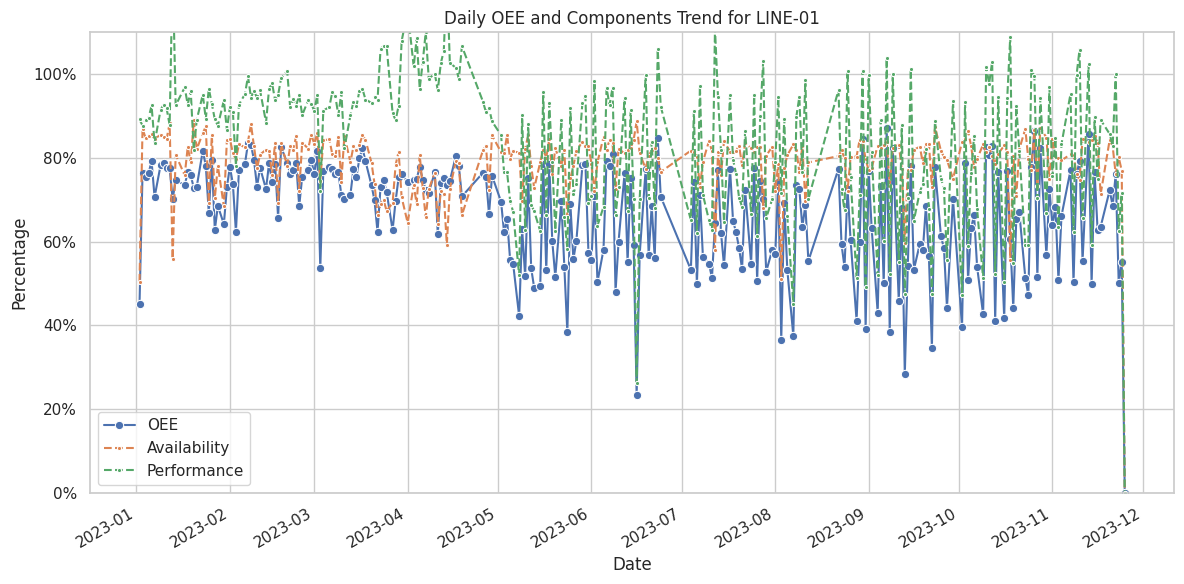

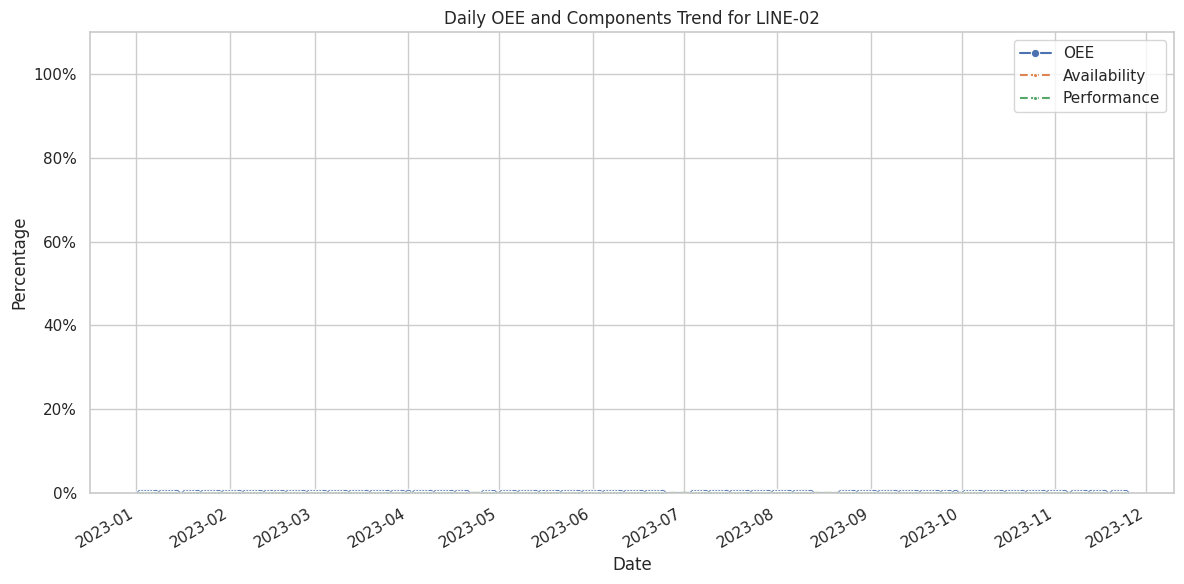

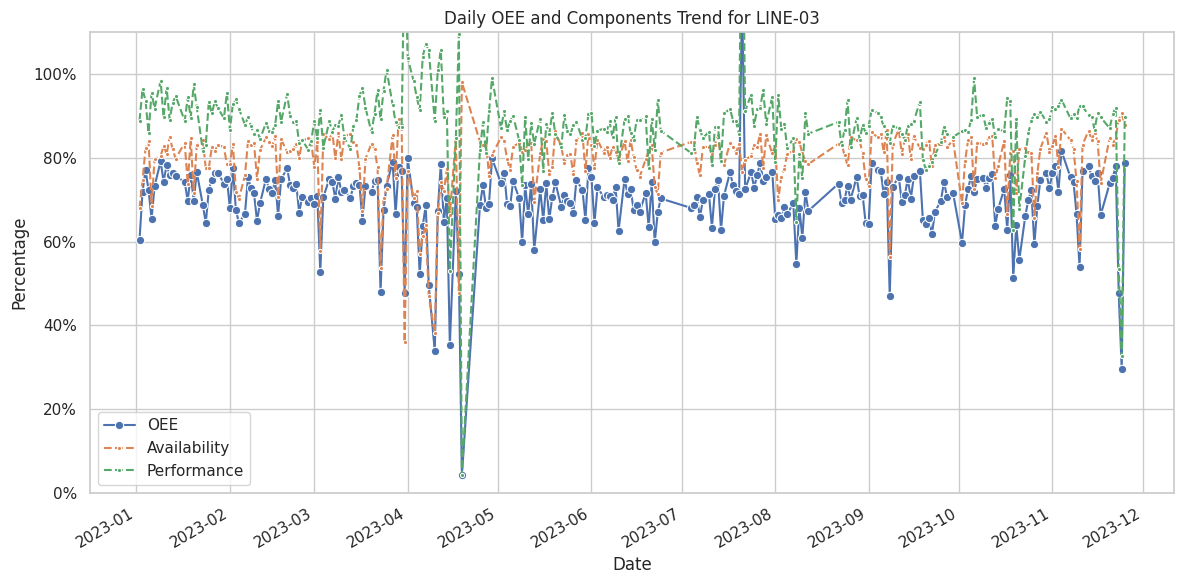

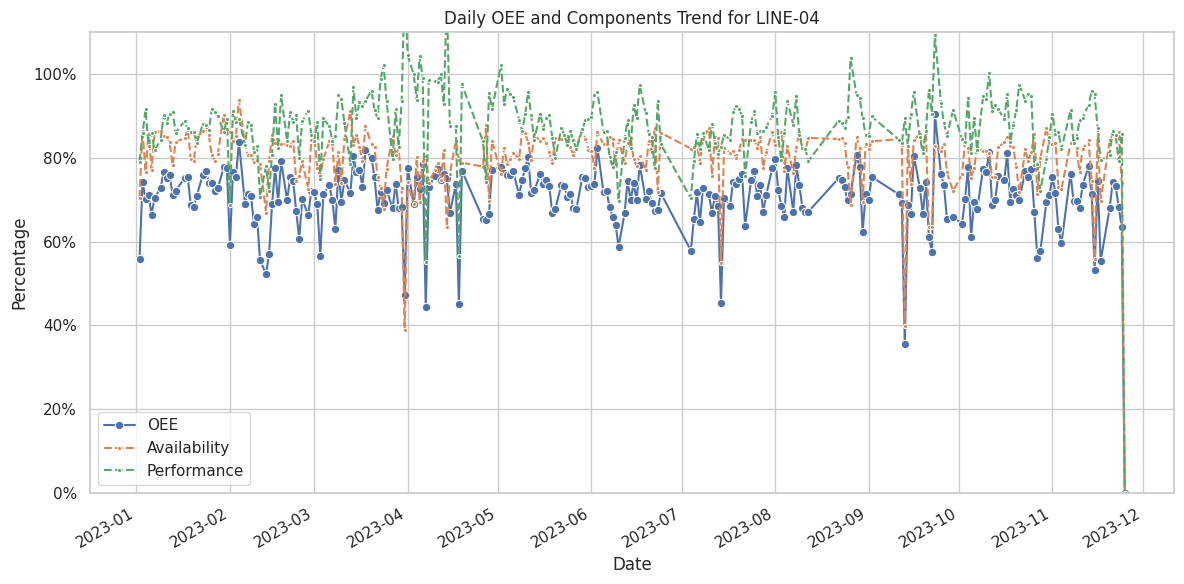

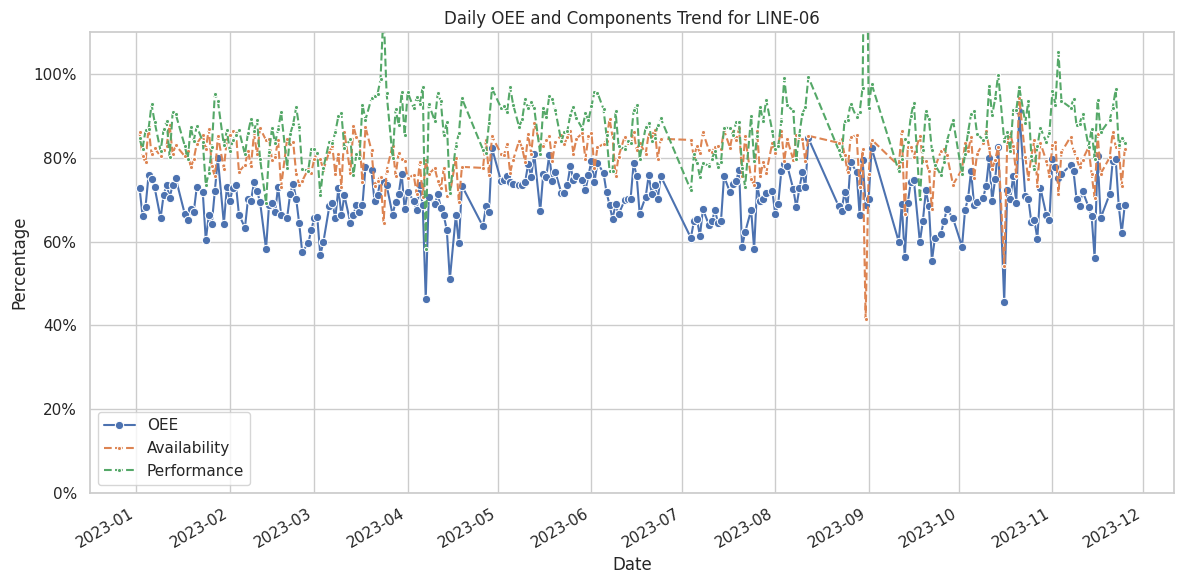

In [128]:
# --- Plot 1: OEE Trend per Line (Separate Plots) ---
print("\n--- Generating Individual Line Trend Plots ---")
for line in unique_lines:
    df_line = daily_oee_results[daily_oee_results['PRODUCTION_LINE'] == line]

    fig, ax = plt.subplots(figsize=(12, 6))

    sns.lineplot(data=df_line, x='Date', y='OEE', ax=ax, marker='o', label='OEE')
    sns.lineplot(data=df_line, x='Date', y='Availability', ax=ax, marker='.', linestyle='--', label='Availability')
    sns.lineplot(data=df_line, x='Date', y='Performance', ax=ax, marker='.', linestyle='--', label='Performance')


    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Daily OEE and Components Trend for {line}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage')
    ax.legend()
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

## Plot 2: Faceted OEE Comparison (One Figure, Multiple Subplots)

In [119]:
num_lines = len(unique_lines)
wrap_cols = 3 if num_lines > 2 else num_lines

g = sns.relplot(
    data=daily_oee_results,
    x='Date',
    y='OEE',
    col='PRODUCTION_LINE',
    kind='line',
    col_wrap=wrap_cols,
    marker='o',
    height=4,
    aspect=1.5,
    facet_kws={'sharey': True}
)


g.set_titles("OEE Trend for {col_name}")
g.set_axis_labels("Date", "OEE")
g.map_dataframe(lambda data, **kwargs: plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0)))
g.map_dataframe(lambda data, **kwargs: plt.gca().set_ylim(0, 1.1))
g.fig.autofmt_xdate(rotation=45)
g.fig.suptitle('Daily OEE Trend Comparison Across Lines', y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Save the faceted plot
plot_filename_faceted = os.path.join(plot_dir, 'oee_trend_comparison_all_lines.png')
plt.savefig(plot_filename_faceted)
print(f"Saved: {plot_filename_faceted}")
plt.close(g.fig)

Saved: oee_plots/oee_trend_comparison_all_lines.png



--- Generating Faceted OEE Comparison Plot ---


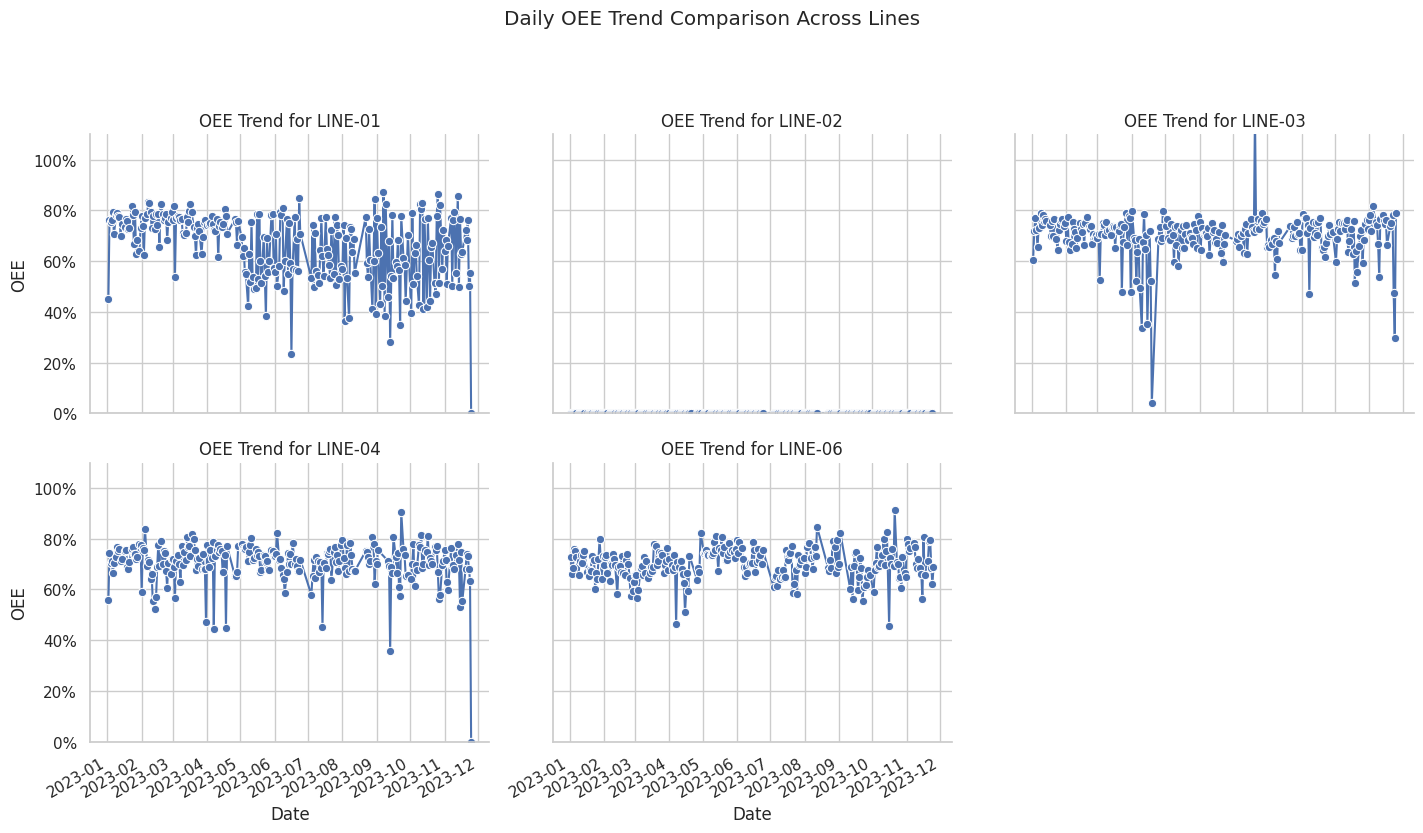

In [126]:
# --- Plot 2: Faceted OEE Comparison (One Figure, Multiple Subplots) ---
print("\n--- Generating Faceted OEE Comparison Plot ---")

num_lines = len(unique_lines)
wrap_cols = 3 if num_lines > 2 else num_lines

g = sns.relplot(
    data=daily_oee_results,
    x='Date',
    y='OEE',
    col='PRODUCTION_LINE',
    kind='line',
    col_wrap=wrap_cols,
    marker='o',
    height=4,
    aspect=1.2,
    facet_kws={'sharey': True}
)


g.set_titles("OEE Trend for {col_name}")
g.set_axis_labels("Date", "OEE")
g.map_dataframe(lambda data, **kwargs: plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0)))
g.map_dataframe(lambda data, **kwargs: plt.gca().set_ylim(0, 1.1))
g.fig.autofmt_xdate(rotation=30)
g.fig.suptitle('Daily OEE Trend Comparison Across Lines', y=1.04)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


## Plot 3: Average OEE per Line (Bar Chart)

In [120]:
avg_oee = daily_oee_results.groupby('PRODUCTION_LINE')[['OEE', 'Availability', 'Performance', 'Quality']].mean().reset_index()
avg_oee_melted = avg_oee.melt(id_vars='PRODUCTION_LINE', var_name='Metric', value_name='Average Value')

fig_avg, ax_avg = plt.subplots(figsize=(12, 6))
sns.barplot(data=avg_oee_melted, x='PRODUCTION_LINE', y='Average Value', hue='Metric', ax=ax_avg)

ax_avg.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax_avg.set_ylim(0, 1.1)
ax_avg.set_title('Average OEE and Components per Production Line')
ax_avg.set_xlabel('Production Line')
ax_avg.set_ylabel('Average Value')
ax_avg.legend(title='Metric')
plt.tight_layout()

plot_filename_avg = os.path.join(plot_dir, 'average_oee_by_line.png')
plt.savefig(plot_filename_avg)
print(f"Saved: {plot_filename_avg}")
plt.close(fig_avg)
plt.show()

Saved: oee_plots/average_oee_by_line.png



--- Generating Average OEE Bar Chart ---


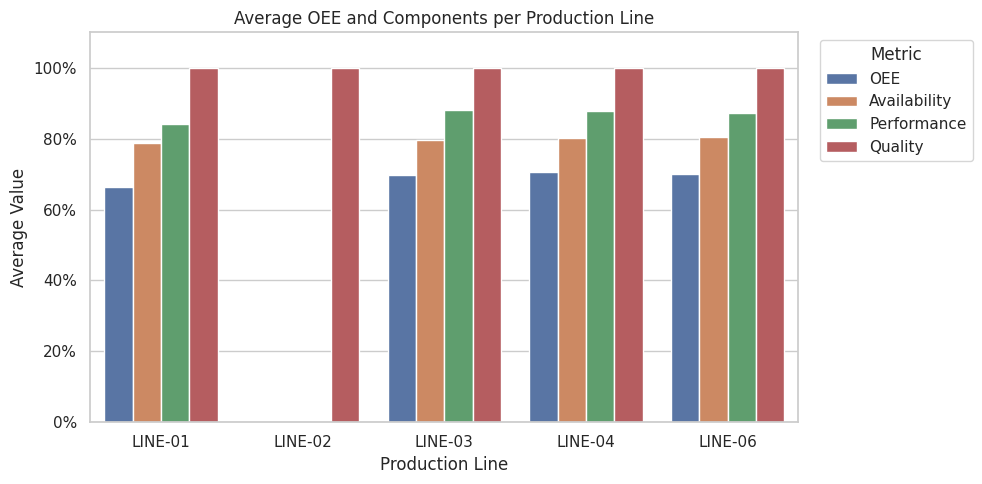

In [127]:
# --- Plot 3: Average OEE per Line (Bar Chart) ---
print("\n--- Generating Average OEE Bar Chart ---")
avg_oee = daily_oee_results.groupby('PRODUCTION_LINE')[['OEE', 'Availability', 'Performance', 'Quality']].mean().reset_index()
avg_oee_melted = avg_oee.melt(id_vars='PRODUCTION_LINE', var_name='Metric', value_name='Average Value')

fig_avg, ax_avg = plt.subplots(figsize=(10, 5))
sns.barplot(data=avg_oee_melted, x='PRODUCTION_LINE', y='Average Value', hue='Metric', ax=ax_avg)

ax_avg.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax_avg.set_ylim(0, 1.1)
ax_avg.set_title('Average OEE and Components per Production Line')
ax_avg.set_xlabel('Production Line')
ax_avg.set_ylabel('Average Value')
ax_avg.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

plot_filename_avg = os.path.join(plot_dir, 'average_oee_by_line.png')
plt.savefig(plot_filename_avg)

plt.show()


# Models

In [130]:
# Voir OEE Models

# Conclusion

# Dashboard

# Read the docs